Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
🔍 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  

/tmp/ipython-input-3-3493694269.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-3493694269.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

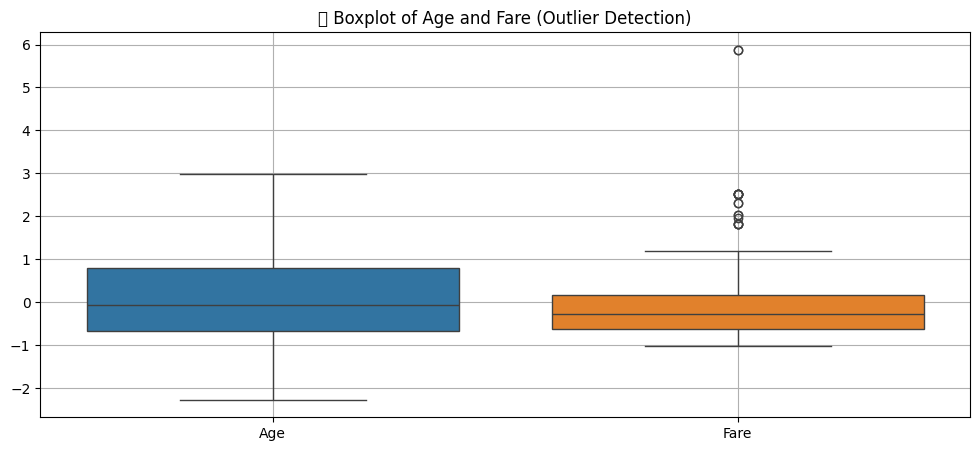


✅ Dataset shape after removing outliers: (187, 12)


In [3]:
# ------------------------------------------
# Titanic Data Preprocessing - All Steps
# ------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Step 4: Explore basic info
print("🔍 First 5 rows:\n", df.head())
print("\n📊 Dataset Info:")
print(df.info())
print("\n📈 Summary Statistics:\n", df.describe())

# Step 5: Handle missing values
print("\n❗ Missing values before handling:\n", df.isnull().sum())

# Fill numerical 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill categorical 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop rows with any remaining missing values (if any)
df.dropna(inplace=True)

print("\n✅ Missing values after handling:\n", df.isnull().sum())

# Step 6: Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])            # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # example: S=2, C=0, Q=1

print("\n🔢 Encoded 'Sex' and 'Embarked':\n", df[['Sex', 'Embarked']].head())

# Step 7: Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("\n📐 Standardized 'Age' and 'Fare':\n", df[['Age', 'Fare']].head())

# Step 8: Visualize outliers using boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("📦 Boxplot of Age and Fare (Outlier Detection)")
plt.grid()
plt.show()

# Step 9: Remove outliers using IQR
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\n✅ Dataset shape after removing outliers:", df.shape)
